In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

#Reference: https://www.kaggle.com/adityadeshpande23/agglomerative-clustering-state-wise-pollution

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("C://Users//user//Desktop//FORE Documents//Courses//Big Data Analytics for Managers (Python)//Session 14//pollution_india_2010.csv")

In [4]:
data.head()

,City,NO2,PM10,SO2,State
0,Chitoor,9,39,4,Andhra Pradesh
1,Guntur,11,81,2,Andhra Pradesh
2,Hydrabad,24,79,5,Andhra Pradesh
3,Kothagudem,11,62,2,Andhra Pradesh
4,Kurnool,9,85,4,Andhra Pradesh


In [5]:
data.isnull().sum()

City     0
NO2      0
PM10     0
SO2      0
State    0
dtype: int64

In [6]:
data.isna().sum()

City     0
NO2      0
PM10     0
SO2      0
State    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
City     181 non-null object
NO2      181 non-null object
PM10     181 non-null object
SO2      181 non-null object
State    181 non-null object
dtypes: object(5)
memory usage: 7.1+ KB


In [8]:
#Reference: https://www.linkedin.com/pulse/change-data-type-columns-pandas-mohit-sharma

data["NO2"] = pd.to_numeric(data["NO2"])

ValueError: Unable to parse string "Null" at position 168

In [9]:
data[data['NO2'] == "Null"]

#Reference: https://www.dezyre.com/recipes/search-value-within-pandas-dataframe-column

,City,NO2,PM10,SO2,State
168,Haldwani,Null,196,Null,Uttarakhand
169,Haridwar,Null,139,Null,Uttarakhand
170,Kashipur,Null,46,Null,Uttarakhand
171,Rishikesh,Null,212,Null,Uttarakhand


In [10]:
data=data.drop([168,169,170,171],axis=0)

In [11]:
data[data['NO2'] == "Null"]

,City,NO2,PM10,SO2,State


In [12]:
data.shape

(177, 5)

In [13]:
#Reference: https://www.linkedin.com/pulse/change-data-type-columns-pandas-mohit-sharma

data["NO2"] = pd.to_numeric(data["NO2"])

In [14]:
#data["SO2"] = pd.to_numeric(data["SO2"])
data["PM10"] = pd.to_numeric(data["PM10"])

ValueError: Unable to parse string "Null" at position 28

In [15]:
print data[data['PM10'] == "Null"]
print data[data['SO2'] == "Null"]

        City  NO2  PM10 SO2        State
28  Bilaspur   19  Null   8  Chattisgarh
         City  NO2 PM10   SO2      State
116  Byrnihat   15  175  Null  Meghalaya


In [16]:
data=data.drop([28,116],axis=0)

In [17]:
data["SO2"] = pd.to_numeric(data["SO2"])
data["PM10"] = pd.to_numeric(data["PM10"])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 180
Data columns (total 5 columns):
City     175 non-null object
NO2      175 non-null int64
PM10     175 non-null int64
SO2      175 non-null int64
State    175 non-null object
dtypes: int64(3), object(2)
memory usage: 8.2+ KB


In [19]:
#Calculate pollution levels state-wise
data_pol=data.groupby('State',as_index=False)[['NO2','PM10','SO2']].agg(np.sum)
data_pol.head()

,State,NO2,PM10,SO2
0,Andhra Pradesh,183,893,60
1,Assam,177,834,74
2,Bihar,40,181,7
3,Chandigarh,16,92,2
4,Chattisgarh,86,502,37


In [63]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
data_num=data_pol.drop("State",axis=1)

In [64]:
scaler.fit(data_num)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
X_scaled_array = scaler.transform(data_num)
X_scaled_array

array([[ 2.37136818e-01,  4.15498576e-01, -3.18492302e-03],
       [ 1.98682199e-01,  3.16828477e-01,  1.81540612e-01],
       [-6.79364937e-01, -7.75232111e-01, -7.02503021e-01],
       [-8.33183414e-01, -9.24073447e-01, -7.68476426e-01],
       [-3.84546191e-01, -2.38399877e-01, -3.06662588e-01],
       [-8.20365207e-01, -1.01270930e+00, -7.02503021e-01],
       [-8.20365207e-01, -1.01939880e+00, -7.02503021e-01],
       [-5.83228390e-01, -6.41442146e-01, -7.28892383e-01],
       [ 4.55046326e-01,  4.15498576e-01,  7.62106580e-01],
       [ 1.28182064e-01, -3.93873043e-02,  5.90575726e-01],
       [-5.31955564e-01, -2.08297135e-01, -2.93467907e-01],
       [-2.62773231e-01, -4.94215517e-02, -5.30972167e-01],
       [-8.39592517e-01, -8.85608832e-01, -7.02503021e-01],
       [ 8.01137898e-01,  1.24834111e+00,  1.28989382e+00],
       [-1.02545651e-01, -3.82224089e-01, -1.21937053e-01],
       [-8.97274446e-02, -3.03622485e-01, -3.06662588e-01],
       [ 2.05091302e-01,  1.05434566e+00

In [67]:
data_scaled = pd.DataFrame(X_scaled_array, columns = data_num.columns)

#print (data_scaled.sample(5))
print (data_scaled.head(5))

        NO2      PM10       SO2
0  0.237137  0.415499 -0.003185
1  0.198682  0.316828  0.181541
2 -0.679365 -0.775232 -0.702503
3 -0.833183 -0.924073 -0.768476
4 -0.384546 -0.238400 -0.306663


In [21]:
#Function to scale the data to equilvalent Z-scores
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_num=data_pol.drop("State",axis=1)
#data_scaled=data_num.apply(scale,axis=1)

In [22]:
data_num

,NO2,PM10,SO2
0,183,893,60
1,177,834,74
2,40,181,7
3,16,92,2
4,86,502,37
5,18,39,7
6,18,35,7
7,55,261,5
8,217,893,118
9,166,621,105


In [23]:
data_scaled=data_num.apply(scale,axis=1)

In [25]:
data_scaled.head()

,NO2,PM10,SO2
0,-0.532950,1.400923,-0.867973
1,-0.548580,1.403137,-0.854557
2,-0.477083,1.391492,-0.914409
3,-0.522653,1.399362,-0.876709
4,-0.586407,1.407697,-0.821290


In [26]:
#Alternate to perform scaling using in-built function
from scipy.cluster.hierarchy import dendrogram, linkage

In [27]:
data_scaled=np.array(data_scaled)

In [28]:
#Ward Linkage With Ward's linkage method, the distance between two clusters is the sum of squared deviations from points to centroids. 
#The objective of Ward's linkage is to minimize the within-cluster sum of squares.
Z=linkage(data_scaled,method="ward")

Dendogram

The agglomerative hierarchical clustering algorithms available in this program module build a cluster hierarchy that is commonly displayed as a tree diagram called a dendrogram. They begin with each object in a separate cluster. At each step, the two clusters that are most similar are joined into a single new cluster. Once fused, objects are never separated.

The horizontal axis of the dendrogram represents the distance or dissimilarity between clusters. The vertical axis represents the objects and clusters. The dendrogram is fairly simple to interpret. Remember that our main interest is in similarity and clustering. Each joining (fusion) of two clusters is represented on the graph by the splitting of a horizontal line into two horizontal lines. The horizontal position of the split, shown by the short vertical bar, gives the distance (dissimilarity) between the two clusters.


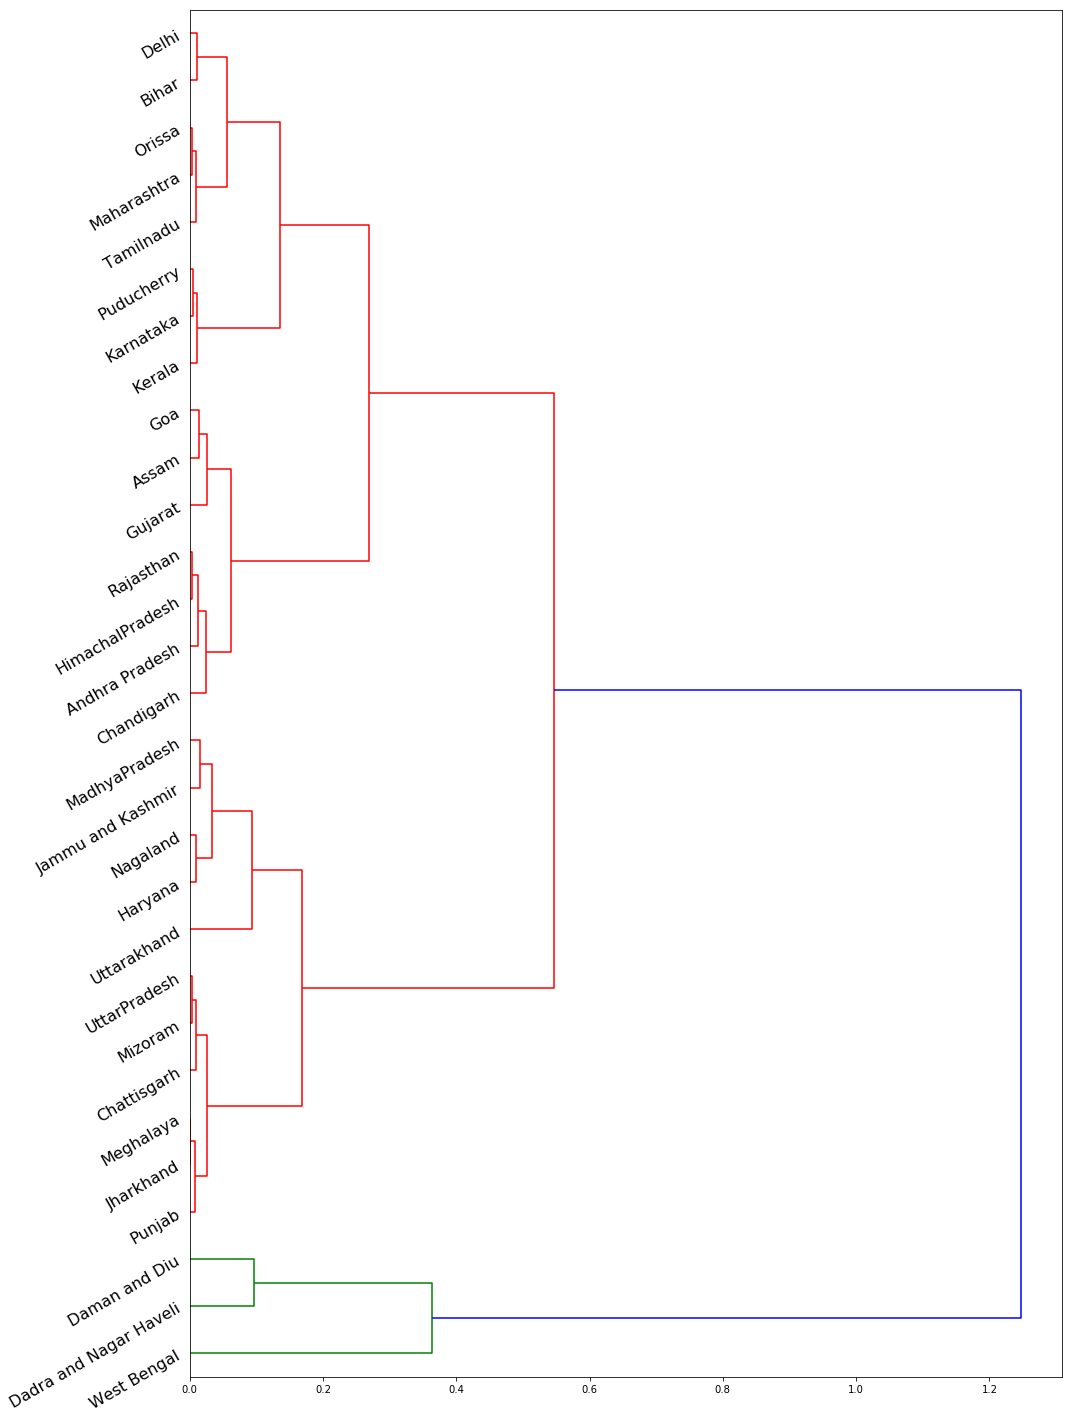

In [29]:
#Plot a Dendogram
fig, ax = plt.subplots(figsize=(15, 20))
ax=dendrogram(Z,orientation="right",labels=np.array(data_pol['State']),leaf_rotation=30,leaf_font_size=16)
plt.tight_layout()
plt.show()